<a href="https://colab.research.google.com/github/PragyanBeuria/BackgroundRemover-multiple-approches/blob/main/binary_backgroundremover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**mount gdrive on colab**

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Background_Remover/custombg/dataset/flower_images

/content/drive/MyDrive/Background_Remover/custombg/dataset/flower_images


**install and import modules and libraries**

In [ ]:
!pip install opencv-python

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import os
import cv2
import numpy as np

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
from PIL import Image

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import os
import shutil

**create directories for input ,train and test**


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
import os

In [ ]:
from keras.models import load_model

In [ ]:
!pip install pillow

In [ ]:
# Set up directories for input, training, and testing data
input_dir = '/content/drive/MyDrive/Background_Remover/custombg/dataset/flower_images'
train_dir = '/content/drive/MyDrive/Background_Remover/custombg/dataset/train'
test_dir = '/content/drive/MyDrive/Background_Remover/custombg/dataset/validation'

**load input dataset into train and test folders**

In [ ]:
# Get a list of class directories in the input directory
class_dirs = [f for f in os.listdir(input_dir) if os.path.isdir(os.path.join(input_dir, f))]

# Split each class directory into train and test directories
for class_dir in class_dirs:
    class_input_dir = os.path.join(input_dir, class_dir)
    class_train_dir = os.path.join(train_dir, class_dir)
    class_test_dir = os.path.join(test_dir, class_dir)

    os.makedirs(class_train_dir, exist_ok=True)
    os.makedirs(class_test_dir, exist_ok=True)

    # Get a list of images in the class directory
    images = [f for f in os.listdir(class_input_dir) if os.path.isfile(os.path.join(class_input_dir, f))]

    # Specify the split index
    split_index = int(len(images) * 0.8)  # 80% for training, 20% for testing

    # Copy images to train directory
    for image in images[:split_index]:
        src_path = os.path.join(class_input_dir, image)
        dst_path = os.path.join(class_train_dir, image)
        shutil.copyfile(src_path, dst_path)

    # Copy images to test directory
    for image in images[split_index:]:
        src_path = os.path.join(class_input_dir, image)
        dst_path = os.path.join(class_test_dir, image)
        shutil.copyfile(src_path, dst_path)


**create codes for image generators forv train and test directories**

In [ ]:
# Set up data augmentation for training data
train_data_gen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True)

In [ ]:
# Load and preprocess the dataset
batch_size = 32
image_size = (256, 256)
train_generator = train_data_gen.flow_from_directory(train_dir,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

Found 390 images belonging to 5 classes.


In [ ]:
# Load and preprocess the testing dataset
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir,
                                                                        target_size=image_size,
                                                                        batch_size=batch_size,
                                                                        class_mode='categorical')

num_classes = len(train_generator.class_indices)

Found 100 images belonging to 5 classes.


**create model for dataset**

In [ ]:
def create_model(input_shape, num_classes):
    # Define your CNN model architecture
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
# Create the model
model = create_model(input_shape,num_classes)

In [ ]:
input_shape=(256,256,3)
num_classes=5

In [ ]:
# Train the model
epochs = 10
model.fit(train_generator,
          steps_per_epoch=train_generator.samples // batch_size,
          validation_data=test_generator,
          validation_steps=test_generator.samples // batch_size,
          epochs=epochs)


Epoch 1/10
12/12 [==============================] - 47s 2s/step - loss: 26.2215 - accuracy: 0.8128 - val_loss: 1.2486 - val_accuracy: 0.2396
Epoch 2/10
12/12 [==============================] - 16s 1s/step - loss: 0.3489 - accuracy: 0.9078 - val_loss: 0.2436 - val_accuracy: 0.9583
Epoch 3/10
12/12 [==============================] - 14s 1s/step - loss: 0.1514 - accuracy: 0.9749 - val_loss: 0.2467 - val_accuracy: 0.9583
Epoch 4/10
12/12 [==============================] - 14s 1s/step - loss: 0.1554 - accuracy: 0.9777 - val_loss: 0.3268 - val_accuracy: 0.9583
Epoch 5/10
12/12 [==============================] - 14s 1s/step - loss: 0.1796 - accuracy: 0.9749 - val_loss: 0.2896 - val_accuracy: 0.9583
Epoch 6/10
12/12 [==============================] - 16s 1s/step - loss: 0.1392 - accuracy: 0.9777 - val_loss: 0.2632 - val_accuracy: 0.9583
Epoch 7/10
12/12 [==============================] - 14s 1s/step - loss: 0.1138 - accuracy: 0.9804 - val_loss: 0.2618 - val_accuracy: 0.9688
Epoch 8/10
12/12 [=

**save model weight**

In [ ]:
# Save the model weights
model.save_weights('/content/drive/MyDrive/Background_Remover/custombg/model_weights/custombgr.h5')

**create background remover functions to create binary mask**

In [ ]:
import cv2
import numpy as np

# Generate binary mask to remove background
def generate_mask(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Binarize the image using Otsu's method
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Apply a median filter to remove noise
    binary = cv2.medianBlur(binary, 3)

    # Resize the mask to match the image size
    mask = cv2.resize(binary, (image.shape[1], image.shape[0]))

    # Reshape the mask to have 3 channels
    mask = np.expand_dims(mask, axis=2)
    mask = np.repeat(mask, 3, axis=2)

    return mask

# Extract foreground object using binary mask
def extract_foreground(image, mask):
    foreground = np.zeros_like(image)
    foreground[mask > 0] = image[mask > 0]
    return foreground

# Remove background from image using binary mask
def remove_background(image, mask):
    background = np.zeros_like(image)
    background[mask == 0] = image[mask == 0]
    return background

# Apply post-processing to the output images for more clarity
def postprocess(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Apply bilateral filter to smooth the edges
    smoothed = cv2.bilateralFilter(gray, 9, 75, 75)

    # Apply threshold to remove any remaining artifacts
    _, binary = cv2.threshold(smoothed, 10, 255, cv2.THRESH_BINARY)

    # Apply median filter to remove noise
    binary = cv2.medianBlur(binary, 3)

    # Apply erosion to remove small holes
    kernel = np.ones((3, 3), np.uint8)
    binary = cv2.erode(binary, kernel, iterations=1)

    # Apply dilation to fill in the remaining holes
    binary = cv2.dilate(binary, kernel, iterations=1)

    # Apply bitwise-and to the original image to get the final result
    result = cv2.bitwise_and(image, image, mask=binary)

    return result

**Load the model weights**

In [ ]:
# Load the model weights
model.load_weights('/content/drive/MyDrive/Background_Remover/custombg/model_weights/custombgr.h5')

**test on custom image**

In [ ]:
# Load a custom image
image_path ='/content/drive/MyDrive/Background_Remover/custombg/dataset/rose.jpg'
image = cv2.imread(image_path)

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Generate the binary mask
mask = generate_mask(image)

# Extract the foreground
foreground = extract_foreground(image, mask)

# Remove the background
background = remove_background(image, mask)

# Apply post-processing to the foreground and background
foreground_processed = postprocess(foreground)

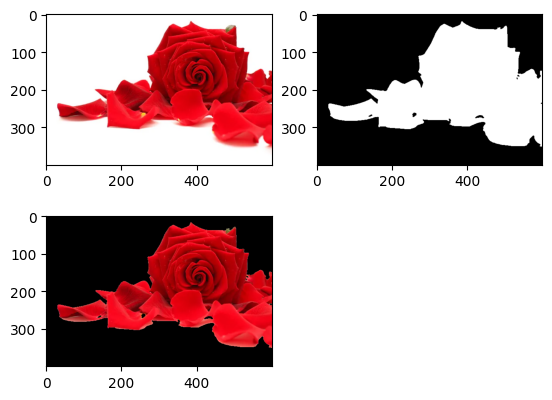

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(image)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(mask)
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(foreground_processed)

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(image_)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(image_with_alpha)
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(image_with_alpha_processed)